### Comparing GridSearch, Random Search, Hyperband,BOHB and GP-UCB

In [14]:
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
import numpy as np

### Load Dataset

In [15]:
d = datasets.load_digits()
X = d.data
y = d.target

# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Algorithm Comparison

### 1. GridSearch

In [16]:
def makegrid(startnormal,endnormal,finegrain): 
    import numpy as np
    start = np.log10(startnormal)
    end = np.log10(endnormal)

    finegrain = finegrain
    stepsize = (end-start)/finegrain

    logvals = []
    for i in range(finegrain):
        logvals.append(start+stepsize)

    grid = [10**x for x in logvals]
    
    return grid

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
rf_params = {
    'C': list(np.logspace(np.log10(1e-2), np.log10(1e1), base = 10, num = 10)),
    'gamma': list(np.logspace(np.log10(1e-4), np.log10(1e1), base = 10, num = 10))
}
clf = SVC()
grid = GridSearchCV(clf, rf_params, cv=5,scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 10.0, 'gamma': 0.004641588833612782}
Accuracy:0.9839944328462074


In [27]:
gs_times = grid.cv_results_['mean_fit_time']+grid.cv_results_['mean_score_time']
gs_scores = grid.cv_results_['mean_test_score']

### 2. RandomSearch

In [19]:
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': list(np.logspace(np.log10(1e-2), np.log10(1e1), base = 10, num = 10)),
    'gamma': list(np.logspace(np.log10(1e-4), np.log10(1e1), base = 10, num = 10))
}
n_iter_search=20
clf = SVC()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'gamma': 0.00035938136638046257, 'C': 0.46415888336127775}
Accuracy:0.9571508069003896


In [26]:
rs_times = Random.cv_results_['mean_fit_time']+Random.cv_results_['mean_score_time']
rs_scores = Random.cv_results_['mean_test_score']

In [22]:
len(rs_times)

20

### 3. Hyperband

In [ ]:
!pip install hpbandster-sklearn

In [54]:
## Reference: https://github.com/Yard1/hpbandster-sklearn

from sklearn.svm import SVC
import numpy as np
from sklearn.utils.validation import check_is_fitted
from hpbandster_sklearn import HpBandSterSearchCV
import ConfigSpace as cs
import ConfigSpace.hyperparameters as CSH


clf = SVC(random_state=0)
np.random.seed(0)

param_distributions = cs.ConfigurationSpace(
    seed=0,
    space={
        "C": (0.01,10.0),  # Note the decimal to make it a float
        "gamma": (1e-4,1e1)
    }
)

# bohb = HpBandSterSearchCV(clf,param_distributions,optimizer='bohb',random_state=0,n_jobs=1, n_iter=20,cv=5,scoring='accuracy', verbose=1).fit(X_train, y_train)

hyperband = HpBandSterSearchCV(clf,param_distributions,optimizer='hyperband',random_state=0,n_jobs=1,cv=5, n_iter=20, verbose=1,scoring='accuracy').fit(X_train, y_train)
# hyperband.best_params_

WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1671129910.0101678
WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
WORKER: registered result for job (0, 0, 2) with dispatcher
WORKER: start processing job (0, 0, 3)
WORKER: registered result for job (0, 0, 3) with dispatcher
WORKER: start processing job (0, 0, 4)
WORKER: registered result for job (0, 0, 4) with dispatcher
WORKER: start processing job (0, 0, 5)
WORKER: registered result for job (0, 0, 5) with dispatcher
WORKER: start processing job (0, 0, 6)
WORKER: registered result for job (0, 0, 6) with dispatcher
WORKER: start processing job (0, 0, 7)
WORKER: registered result for job (0, 0, 7) with dispatcher
WORKER: start processing job (0, 0, 8)
WORKER: registered result for job (0, 0, 8) with di

WORKER: registered result for job (12, 0, 1) with dispatcher
WORKER: start processing job (12, 0, 2)
WORKER: registered result for job (12, 0, 2) with dispatcher
WORKER: start processing job (12, 0, 3)
WORKER: registered result for job (12, 0, 3) with dispatcher
WORKER: start processing job (12, 0, 4)
WORKER: registered result for job (12, 0, 4) with dispatcher
WORKER: start processing job (12, 0, 5)
WORKER: registered result for job (12, 0, 5) with dispatcher
WORKER: start processing job (12, 0, 6)
WORKER: registered result for job (12, 0, 6) with dispatcher
WORKER: start processing job (12, 0, 7)
WORKER: registered result for job (12, 0, 7) with dispatcher
WORKER: start processing job (12, 0, 8)
WORKER: registered result for job (12, 0, 8) with dispatcher
WORKER: start processing job (12, 0, 0)
WORKER: registered result for job (12, 0, 0) with dispatcher
WORKER: start processing job (12, 0, 4)
WORKER: registered result for job (12, 0, 4) with dispatcher
WORKER: start processing job (

In [65]:
hyperband_times = hyperband.cv_results_['mean_fit_time']+hyperband.cv_results_['mean_score_time']
hyperband_scores = hyperband.cv_results_['mean_test_score']

In [64]:
hyperband.cv_results_

{'run': [0,
  0,
  1,
  2,
  3,
  4,
  4,
  4,
  5,
  6,
  7,
  7,
  8,
  0,
  0,
  1,
  2,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  6,
  6,
  7,
  8,
  8,
  0,
  1,
  2,
  2,
  0,
  1,
  2,
  0,
  1,
  2,
  3,
  3,
  4,
  4,
  5,
  6,
  7,
  7,
  7,
  8,
  0,
  0,
  1,
  2,
  0,
  1,
  2,
  0,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  4,
  5,
  6,
  7,
  8,
  0,
  1,
  2,
  2,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  4,
  4,
  4,
  5,
  6,
  6,
  7,
  8,
  0,
  1,
  1,
  2,
  0,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  3,
  4,
  4,
  4,
  5,
  6,
  7,
  8,
  0,
  1,
  2,
  2,
  0,
  1,
  2,
  0,
  1,
  1,
  1,
  2,
  3,
  4,
  4,
  5,
  5,
  6,
  7,
  8,
  0,
  1,
  2,
  2],
 'iter': [0,
  1,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  0,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  2,
  0,
  1,
  2,
  1,
  1,
  2,
  2,
  2,

### 4. GP-UCB

In [29]:
## Reference: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

from skopt import BayesSearchCV 
from sklearn.svm import SVC
## Hack since the sklearn version has some issues, https://github.com/scikit-optimize/scikit-optimize/issues/978
def bayes_search_CV_init(self, estimator, search_spaces, optimizer_kwargs=None,
                         n_iter=50, scoring=None, fit_params=None, n_jobs=1,
                         n_points=1, iid=True, refit=True, cv=None, verbose=0,
                         pre_dispatch='2*n_jobs', random_state=None,
                         error_score='raise', return_train_score=False):

        self.search_spaces = search_spaces
        self.n_iter = n_iter
        self.n_points = n_points
        self.random_state = random_state
        self.optimizer_kwargs = optimizer_kwargs
        self._check_search_space(self.search_spaces)
        self.fit_params = fit_params

        super(BayesSearchCV, self).__init__(
             estimator=estimator, scoring=scoring,
             n_jobs=n_jobs, refit=refit, cv=cv, verbose=verbose,
             pre_dispatch=pre_dispatch, error_score=error_score,
             return_train_score=return_train_score)
        
BayesSearchCV.__init__ = bayes_search_CV_init



from skopt import Optimizer
from skopt.space import Real, Categorical, Integer
rf_params = {
    'C': Real(0.01,10.0),
    'gamma': Real(1e-4,1e1)
}
clf = SVC()
Bayes = BayesSearchCV(clf, rf_params,optimizer_kwargs = {'acq_func':'LCB'},cv=5,n_iter=20, n_jobs=1,scoring='accuracy')
Bayes.fit(X_train, y_train)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('C', 10.0), ('gamma', 0.08154079215944686)])
Accuracy:0.958933410762679


In [35]:
gpucb_times=Bayes.cv_results_['mean_fit_time']+Bayes.cv_results_['mean_score_time']
gpucb_scores = Bayes.cv_results_['mean_test_score']

### 4. BOHB

In [31]:
## Reference: https://github.com/Yard1/hpbandster-sklearn

from sklearn.svm import SVC
import numpy as np
from sklearn.utils.validation import check_is_fitted
from hpbandster_sklearn import HpBandSterSearchCV
import ConfigSpace as cs
import ConfigSpace.hyperparameters as CSH


clf = SVC(random_state=0)
np.random.seed(0)

param_distributions = cs.ConfigurationSpace(
    seed=0,
    space={
        "C": (0.01,10.0),  # Note the decimal to make it a float
        "gamma": (1e-4,1e1)
    }
)

bohb = HpBandSterSearchCV(clf,param_distributions,optimizer='bohb',random_state=0,n_jobs=1, n_iter=20,cv=5,scoring='accuracy', verbose=1).fit(X_train, y_train)
# search.best_params_

WORKER: start listening for jobs
HBMASTER: starting run at 1671127876.7342155
HBMASTER: adjusted queue size to (0, 1)
WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
WORKER: registered result for job (0, 0, 2) with dispatcher
WORKER: start processing job (0, 0, 3)
WORKER: registered result for job (0, 0, 3) with dispatcher
WORKER: start processing job (0, 0, 4)
WORKER: registered result for job (0, 0, 4) with dispatcher
WORKER: start processing job (0, 0, 5)
WORKER: registered result for job (0, 0, 5) with dispatcher
WORKER: start processing job (0, 0, 6)
WORKER: registered result for job (0, 0, 6) with dispatcher
WORKER: start processing job (0, 0, 7)
WORKER: registered result for job (0, 0, 7) with dispatcher
WORKER: start processing job (0, 0, 8)
WORKER: registered result for job (0, 0, 8) with di

WORKER: registered result for job (12, 0, 1) with dispatcher
WORKER: start processing job (12, 0, 2)
WORKER: registered result for job (12, 0, 2) with dispatcher
WORKER: start processing job (12, 0, 3)
WORKER: registered result for job (12, 0, 3) with dispatcher
WORKER: start processing job (12, 0, 4)
WORKER: registered result for job (12, 0, 4) with dispatcher
WORKER: start processing job (12, 0, 5)
WORKER: registered result for job (12, 0, 5) with dispatcher
WORKER: start processing job (12, 0, 6)
WORKER: registered result for job (12, 0, 6) with dispatcher
WORKER: start processing job (12, 0, 7)
WORKER: registered result for job (12, 0, 7) with dispatcher
WORKER: start processing job (12, 0, 8)
WORKER: registered result for job (12, 0, 8) with dispatcher
WORKER: start processing job (12, 0, 1)
WORKER: registered result for job (12, 0, 1) with dispatcher
WORKER: start processing job (12, 0, 2)
WORKER: registered result for job (12, 0, 2) with dispatcher
WORKER: start processing job (

In [33]:
bohb_times = bohb.cv_results_['mean_fit_time']+bohb.cv_results_['mean_score_time']
bohb_scores = bohb.cv_results_['mean_test_score']

In [66]:
def btd(array):
    ##best_to_date
    max_val = 0
    max_vals = []
    for ele in array:
        if(ele>max_val):
            max_val = ele
        max_vals.append(max_val)
        
    return max_vals


def cum_time(array):
    total = 0
    cum_times = []
    for ele in array:
        total+=ele
        cum_times.append(total)
    return cum_times

In [67]:
gs_scores_max,rs_scores_max,hyperband_scores_max = btd(gs_scores),btd(rs_scores),btd(hyperband_scores)
gpucb_scores_max,bohb_scores_max = btd(gpucb_scores),btd(bohb_scores)

In [68]:
gs_times_cum,rs_times_cum,hyperband_times_cum = cum_time(gs_times),cum_time(rs_times),cum_time(hyperband_times)
gpucb_times_cum,bohb_times_cum = cum_time(gpucb_times),cum_time(bohb_times)

In [69]:
hyperband_scores

array([0.10716705, 0.10716705, 0.10716705, 0.10716705, 0.10716705,
       0.10855836, 0.10855836, 0.10855836, 0.10716705, 0.10716705,
       0.10855836, 0.10855836, 0.10716705, 0.10716705, 0.10716705,
       0.10716705, 0.10716705, 0.10716705, 0.10716705, 0.10855836,
       0.10716705, 0.10716705, 0.10716705, 0.10716705, 0.10716705,
       0.10716705, 0.10716705, 0.19065283, 0.19065283, 0.19065283,
       0.10716705, 0.11621419, 0.11621419, 0.10855836, 0.10716705,
       0.12734708, 0.12734708, 0.11273471, 0.10855836, 0.10855836,
       0.12595577, 0.11482288, 0.10855836, 0.12734708, 0.12734708,
       0.12734708, 0.12734708, 0.10716705, 0.10716705, 0.35207123,
       0.35207123, 0.35207123, 0.12178426, 0.12247871, 0.12247871,
       0.10855836, 0.10716705, 0.10855836, 0.12734708, 0.10716705,
       0.10716705, 0.10716705, 0.11204026, 0.11204026, 0.81627468,
       0.81627468, 0.97981756, 0.97981756, 0.97981756, 0.10855836,
       0.10716705, 0.10716705, 0.10716705, 0.10716705, 0.10716

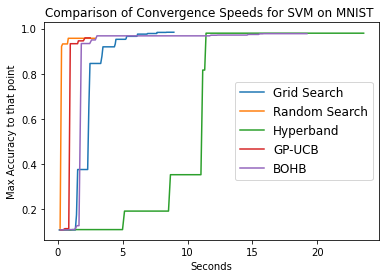

In [71]:
from matplotlib import pyplot as plt
import pandas as pd

gs_x = gs_times_cum
gs_y = gs_scores_max
gs_series = pd.Series(data=gs_y, index=gs_x)

rs_x = rs_times_cum
rs_y = rs_scores_max
rs_series = pd.Series(data=rs_y, index=rs_x)

hyperband_x = hyperband_times_cum
hyperband_y = hyperband_scores_max
hyperband_series = pd.Series(data=hyperband_y, index=hyperband_x)

gpucb_x = gpucb_times_cum
gpucb_y = gpucb_scores_max
gpucb_series = pd.Series(data=gpucb_y, index=gpucb_x)

bohb_x = bohb_times_cum
bohb_y = bohb_scores_max
bohb_series = pd.Series(data=bohb_y, index=bohb_x)


fig, ax = plt.subplots()
ax.plot(gs_series, label='Grid Search')
ax.plot(rs_series, label='Random Search')
ax.plot(hyperband_series, label='Hyperband')
ax.plot(gpucb_series, label='GP-UCB')
ax.plot(bohb_series, label='BOHB')
legend = ax.legend(loc='center right', fontsize='large')
plt.xlabel('Seconds')
plt.ylabel('Max Accuracy to that point')
plt.title('Comparison of Convergence Speeds for SVM on MNIST ')
plt.show()




In [ ]:
import pickle
# with open('BOHB.pickle', 'wb') as handle:
#     pickle.dump(bohb.cv_results_, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('BOHB.pickle', 'rb') as handle:
    bohb_dict = pickle.load(handle)

In [ ]:
bohb.best_estimator_

In [ ]:
bohb_times = bohb.cv_results_['mean_fit_time']

In [ ]:
bohb_scores = bohb.cv_results_['mean_test_score']

In [ ]:
from sklearn.metrics import log_loss,accuracy_score
def evaluate(params):
    classifier = SVC().set_params(**params)
    classifier.fit(X_train, y_train)
    
    y_pred=classifier.predict(X_test)
    labels = [0,1,2,3,4,5,6,7,8,9]
#     loss = log_loss(y_pred,y_test,labels=labels)
    acc = accuracy_score(y_pred,y_test)
    return acc

In [ ]:
## Random Search
rs_acc = []
for param in rs['params']:
    rs_acc.append(evaluate(param))

In [ ]:
gs_acc = []
for param in gs['params']:
    gs_acc.append(evaluate(param))

In [ ]:
## Random Search
gpucb_acc = []
for param in gpucb['params']:
    gpucb_acc.append(evaluate(param))

In [ ]:
hb_acc = []
for param in hb['params']:
    hb_acc.append(evaluate(param))

In [ ]:
bohb_acc = []
for param in bohb_dict['params']:
    bohb_acc.append(evaluate(param))

In [ ]:
import matplotlib.pyplot as plt
Accuracy = plt.plot(gs_acc,label='gs_acc')
Accuracy = plt.xlabel('iter')
Accuracy = plt.ylabel('Accuracy')
Accuracy = plt.plot(rs_acc,label='rs_acc')
Accuracy = plt.xlabel('iter')
Accuracy = plt.ylabel('Accuracy')
Accuracy = plt.plot(hb_acc[:20],label='bohb_acc')
Accuracy = plt.xlabel('iter')
Accuracy = plt.ylabel('Accuracy')
Accuracy = plt.plot(bohb_acc[:20],label='bohb_acc')
Accuracy = plt.xlabel('iter')
Accuracy = plt.ylabel('Accuracy')
Accuracy = plt.plot(gpucb_acc,label='gpucb_acc')
Accuracy = plt.xlabel('iter')
Accuracy = plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
rs_acc

In [ ]:
import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

In [ ]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

In [ ]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="LCB",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

In [ ]:
print(res)

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(res);

In [ ]:
import numpy as np
from sklearn.svm import SVC




# Function mapping hyperparameters to a real-valued scpre
def objective(hyperparameters):
    
    # Machine learning model
    svm = SVC(**hyperparameters)
    
    
    
    # Training 
    svm.fit(X_train, y_train)
    
    # Making predictions and evaluating
    predictions = svm.predict(X_valid)
    rmse = np.sqrt(np.mean(np.square(prediction - y_valid)))
    
    return rmse